In [111]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from copy import deepcopy
import pandas as pd
from sklearn import preprocessing

lam = 0.5
gamma=0.5
def sm_loss(X,y,w):
    phi_z=[]
    for i in range(len(X)):
        z=y[i]*np.dot(w, X[i])
        if z>=1:
            phi_z.append(0)
        elif (1-gamma)<z<1:
            phi_z.append((1-z)**2/(2*gamma))
        else:
            phi_z.append(1-0.5*gamma-z)
        
    return np.sum(phi_z)
def objective(X,y,w, lam):
    tmp=[]
    n_samples, m_features = X.shape
    return sm_loss(X,y,w)/n_samples+lam*np.sum(np.abs(w))

def prox(z, m_features):
    w = np.zeros(m_features,dtype=float)
    for i in range(m_features):
        if z[i] > lam:
            w[i] = z[i] - lam
        elif -lam < z[i] < lam:
            w[i]= 0
        else:
            w[i] = z[i] + lam
    return w

def lasso_proximal_gradient_acc_ver(X, y, lam, L=1, max_iter=1000,tol=1e-4 ):
    beta = 0.5
    n_samples, m_features = X.shape
    s = [1]*max_iter
    w = np.empty(m_features, dtype=float)
    v = w
    w_pre = np.empty(m_features,dtype=float)
    #grad_w=np.empty(m_features,dtype=float)
    prox_thres = lam/L
    h_prox_optval = np.empty(max_iter, dtype=float)
    path=[]
    for k in range(max_iter):
        los_w_tmp=[]
        w_tmp=np.zeros(m_features,dtype=float)
        for i,x in enumerate(X):
            if (y[i]*np.dot(X[i],w))>=1:
                grad_w = np.zeros(m_features,dtype=float)
            elif -0.5<(y[i]*np.dot(X[i],w))<1:
                grad_w = 2*(1-X[i]*y[i]*w)*X[i]*y[i]
            else:
                grad_w = X[i]*y[i]
            #w_tmp = np.sign(v-grad_w/L)*np.maximum(np.abs(v-grad_w/L)-prox_thres,0)
            z = w - grad_w/L
            w_tmp = prox(z, m_features)
            w_diff = w_tmp-w
            los_w_tmp.append(sm_loss(X, y, w_tmp))
            if sm_loss(X, y, w_tmp) <= sm_loss(X, y, w) + np.dot(grad_w, w_diff) + L/2 * np.sum(w_diff**2):
                break
        s[k+1]=(1+(1+4*s[k])**(1/2))/2
        v=w_tmp + ((1-s[k])/s[k+1])*(w-w_tmp)
        L = L / beta
        w_pre=deepcopy(w)
        w = deepcopy(w_tmp)
        path.append(w)
        h_prox_optval[k] = objective(X, y,w,lam)
        if k>0 and abs(h_prox_optval[k]-h_prox_optval[k-1])<tol:
            break
    return path,w, h_prox_optval[:k+1]   

In [112]:
dataset = np.random.uniform(-1,1,(100,2))
po_data = [val for val in dataset if val[0]>0]
ne_data=[val for val in dataset if val[0]<0]
y=[1]*len(po_data)+[-1]*len(ne_data)
# po_frame = pd.DataFrame(po_data)
# ne_frame = pd.DataFrame(ne_data)
# data_frame = pd.concat([po_frame, ne_frame])
#data_frame['y'] = y
w = np.empty(2, dtype=float)

In [113]:
path,w, h_prox_optval=lasso_proximal_gradient_acc_ver(dataset, y, 0.5,tol=1e-4 )

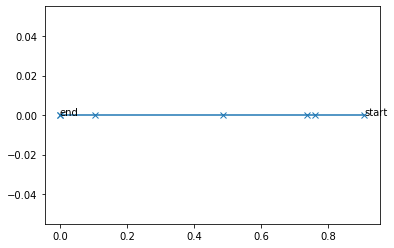

In [114]:
x1=[x[0] for x in path]
x2=[x[1] for x in path]
plt.text(x1[0],x2[0],'start')
plt.text(x1[-1],x2[-1],'end')
plt.plot(x1,x2,'-x')
#plt.savefig('figure_1 process of training of AccProxGrad')

In [63]:
len(h_prox_optval)

5

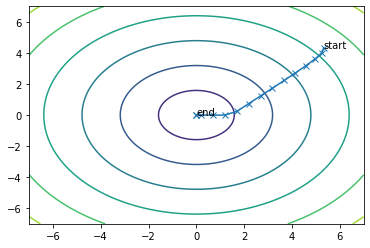

In [15]:
from numpy import linalg as LA

w1=np.linspace(-7,7,100)
w2=np.linspace(-7,7,100)
w_1,w_2=np.meshgrid(w1,w2)

matrix_1=np.zeros((100,100))
for i in range(len(w1)):
    for j in range(len(w2)):
        matrix_1[i,j]=LA.norm([w1[i],w2[j]])

matrix_2=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        phi_z=[]
        for d in range(len(dataset)):
            z=y[d]*np.dot([w1[i],w2[j]], dataset[d])
            if z>=1:
                phi_z.append(0)
            if 1-gamma<z<1:
                phi_z.append((1-z)**2/(2*gamma))
            else:
                phi_z.append(1-0.5*gamma-z)
        
        matrix_2[i,j]=np.sum(phi_z)/100

F_w = matrix_1*0.5+matrix_2/100
plt.contour(w_1,w_2,F_w)
plt.text(x1[0],x2[0],'start')
plt.text(x1[-1],x2[-1],'end')
plt.plot(x1,x2,'-x')
plt.savefig('AccProxGrad training processing of Toy-data')